# Neural Networks is a mathematical function that maps a given input to a desired output.

A simple feedforward Neural Networks consist of the following components
- An input layer, **x**
- An arbitrary amount of **hidden layers**
- An **output** layer, ŷ
- A set of **weights** and **biases** between each layer, W and b
- A choice of **activation function** (Sigmoid) for each hidden layer, σ.

<img src="https://cdn-images-1.medium.com/max/1600/1*sX6T0Y4aa3ARh7IBS_sdqw.png">

We exclude the input layer when counting the number of neurons


In [2]:
import numpy as np

def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

## Creating the neural network



In [111]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,1) 
        self.y          = y
        self.output     = None

## Training the neural network

Is the process of fine-tuning the weights and biases from the input data

The output ŷ of a simple 2-layer Neural Network is:

<img src="https://cdn-images-1.medium.com/max/1600/1*E1_l8PGamc2xTNS87XGNcA.png">

Each iteration of the training process consists of the following steps:

- Calculating the predicted output ŷ, known as **feedforward**
- **Updating** the **weights** and **biases**, known as **backpropagation**

<img src="https://cdn-images-1.medium.com/max/1600/1*CEtt0h8Rss_qPu7CyqMTdQ.png">

### 1 - Feedforward

In [94]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,1) 
        self.y          = y
        self.output     = None

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

Now we need a way to evaluate the “goodness” of our predictions **The Loss Function** allows us to do exactly that.

### 2 - Loss function

There are many available loss functions, and the nature of our problem should dictate our choice of loss function.
We’ll use a simple sum-of-sqaures error as our loss function.

**Our goal in training is to find the best set of weights and biases that minimizes the loss function.**

<img src="https://cdn-images-1.medium.com/max/1600/1*iNa1VLdaeqwUAxpNXs3jwQ.png">

### 3 - Backpropagation

Now that we’ve measured the error of our prediction (loss), we need to find a way to propagate the error back, and to update our weights and biases.
In order to know the appropriate amount to adjust the weights and biases by, we need to know the derivative of the loss function with respect to the weights and biases.

In order to know the appropriate amount to adjust the weights and biases by, we need to know the derivative of the loss function with respect to the weights and biases.

<img src="https://cdn-images-1.medium.com/max/1600/1*3FgDOt4kJxK2QZlb9T0cpg.png"/>

If we have the derivative, we can simply update the weights and biases by increasing/reducing with it(refer to the diagram above). **This is known as gradient descent.**

However, we can’t directly calculate the derivative of the loss function with respect to the weights and biases because the equation of the loss function does not contain the weights and biases. Therefore, we need the **chain rule** to help us calculate it.

<img src="https://cdn-images-1.medium.com/max/1600/1*7zxb2lfWWKaVxnmq2o69Mw.png"/>

The derivative (slope) of the loss function with respect to the weights, so that we can adjust the weights accordingly.

In [3]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,1)                 
        self.y          = y
        self.output     = None

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2

In [5]:
 X = np.array([[0,0],
                  [1,0],
                  [0,1],
                  [1,1]])
y = np.array([[0],[0],[0],[1]])


nn = NeuralNetwork(X, y)

errors = []
for epoch in range(1500):
    
    nn.feedforward()
    errors.append(np.mean(np.power(y - nn.output, 2))) # artithmetic mean (sum/count)
    nn.backprop()
    
print('prediction \n', nn.output)
print('true values \n', y)

prediction 
 [[8.42073538e-04]
 [1.67765510e-02]
 [1.86321692e-02]
 [9.73035569e-01]]
true values 
 [[0]
 [0]
 [0]
 [1]]


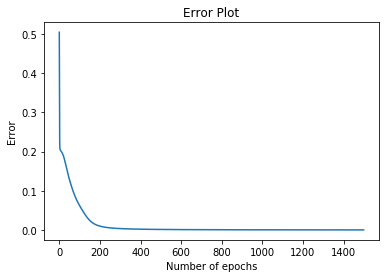

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.title("Error Plot")
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.plot(errors)
plt.show()